<a href="https://colab.research.google.com/github/pranava-25/Codsoft/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance
import joblib

In [ ]:
def load_and_preprocess(path):
    df = pd.read_csv("/content/Churn_Modelling.csv")
    df.columns = df.columns.str.strip()

    df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    X = df_encoded.drop('Exited', axis=1)
    y = df_encoded['Exited']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, X.columns.tolist()


In [ ]:
def train_models(X_train, X_test, y_train, y_test, feature_names):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)

        print(f"\n{name} Accuracy: {acc:.4f}")
        print(classification_report(y_test, preds))

        if hasattr(model, "feature_importances_"):
            plot_feature_importance(model, feature_names, name)

        joblib.dump(model, f"{name.replace(' ', '_').lower()}_model.pkl")
        print(f"Saved model: {name.replace(' ', '_').lower()}_model.pkl")


In [ ]:
def plot_feature_importance(model, feature_names, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:]  # Top 10 features

    plt.figure(figsize=(10, 6))
    plt.title(f"Top 10 Feature Importances - {model_name}")
    plt.barh(range(len(indices)), importances[indices], color='skyblue')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

In [ ]:
def main():
    X, y, feature_names = load_and_preprocess("/content/Churn_Modelling.csv")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    train_models(X_train, X_test, y_train, y_test, feature_names)



Logistic Regression Accuracy: 0.8110
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Saved model: logistic_regression_model.pkl

Random Forest Accuracy: 0.8670
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



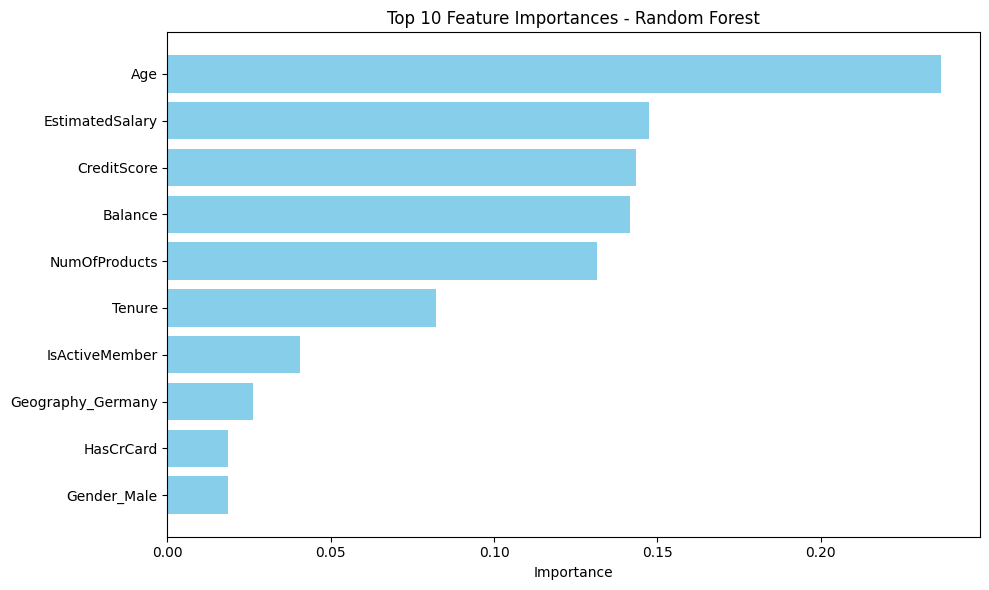

Saved model: random_forest_model.pkl

Gradient Boosting Accuracy: 0.8675
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



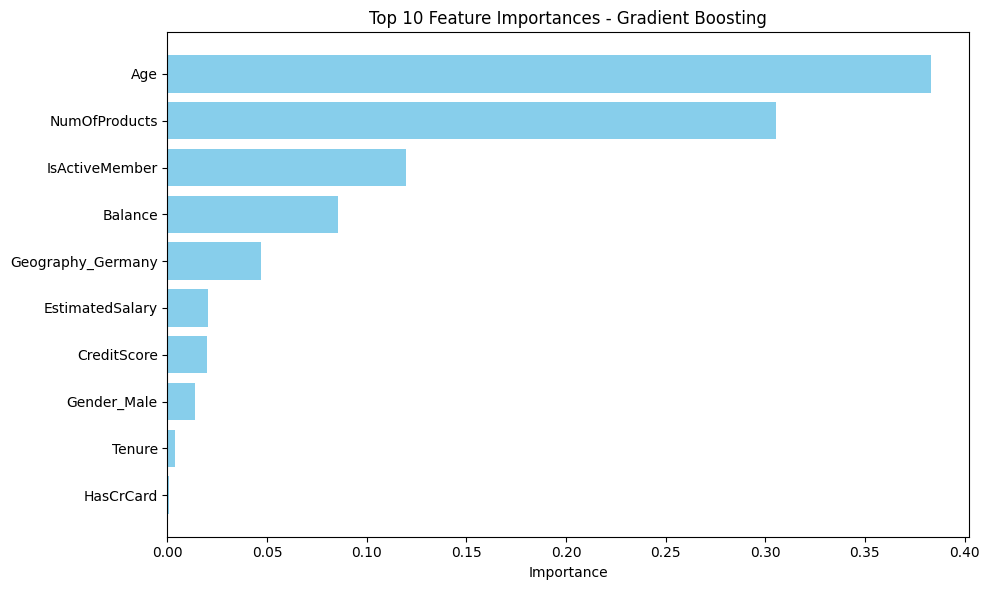

Saved model: gradient_boosting_model.pkl


In [ ]:
if __name__ == "__main__":
    main()
